# TP1

Section 1 : Fusion par pyramide Laplacienne de 2 images

1.1 Pyramide Laplacienne

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def Pyr_Laplacienne( img , nlayers ):
    
    # Laplacienne
    Laplacienne = []
    
    # On downsample
    layer = np.copy( img )
    
    # Pour chaque couche on 
    # soustrait le downsample par 
    # le upsample (gaussienne - gaussienne_etendue)
    for L in range(nlayers):
        
        # On calcule la Laplacienne
        if L < nlayers - 1 :
            rows, cols , _ = img.shape
            gaussienne = layer 
            layer = cv2.pyrDown( layer , dstsize = (cols // 2 , rows // 2))
            gaussienne_etendue = cv2.pyrUp( layer , dstsize = (cols , rows ) ) 
            Laplacienne.append( cv2.subtract( gaussienne , gaussienne_etendue  ) )
            img = layer
        
        # La gaussienne a été calculée à 
        # l'itération précédente 
        else:
            Laplacienne.append( layer )
    
    return Laplacienne


1.2 Calcul des maximums des pyramides entre 2 images (pour chaque niveau)

In [2]:
def max_lap_pyr(lap1,lap2,levels):
    # Maximum des laplaciens à chaque niveau
    Max_Level = [  ]
    
    print( len( lap1 ) , len( lap2 ) )
    for i in range( len( lap1 ) - 1 ): 
          
        # Si la somme des pixels de la Laplacienne
        # de l'image 1 est plus grande que celle de 
        # l'image 2
        if lap1[i].sum() >= lap2[i].sum() :
            Max_Level.append( lap1[i] )
        
        # Si la somme des pixels de la Laplacienne
        # de l'image 2 est plus grande que celle de 
        # l'image 1
        else:
            Max_Level.append( lap2[i] )
        
    # On fusionne les images du dernier niveau 
    Max_Level.append( FusLastLevel( lap1[ levels - 1 ]  , lap2[ levels - 1 ] ) )
    
    return Max_Level


1.3 Fusion des deux images du dernier niveau

In [3]:
# Fonction qui fusionne les images du dernier niveau 
def FusLastLevel( gaus1 , gaus2 ):
    return cv2.addWeighted( gaus1 , 0.5 , gaus2 , 0.5 , 0 ) 

1.4 Fusion de tous les niveaux et expansion

5 5


Text(0.5, 1.0, 'Image 1')

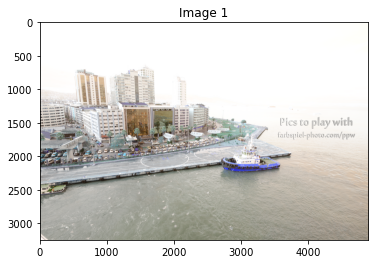

In [13]:
def fus_lap_pyr( img1 , img2 , levels ) :
    # Laplacienne de la 1ère image
    lap1 = Pyr_Laplacienne(img1,Niveaux)
    # Laplacienne de la 2ième image
    lap2 = Pyr_Laplacienne(img2,Niveaux)
    # Maximum de chaque niveau des laplaciennes des
    # deux images
    Maximum = max_lap_pyr( lap1 , lap2 , Niveaux ) 
    # Fusion du dernier niveau
    Img_Last_Level = FusLastLevel( lap1[ Niveaux - 1 ] , lap2[ Niveaux - 1 ] ) 
    somme = Img_Last_Level
    for i in range( len( Maximum ) - 1 , 0 , -1 ) :
        rows, cols , _ = Maximum[ i - 1 ].shape
        expansion = cv2.pyrUp( somme , dstsize = ( cols , rows ) )
        somme = cv2.add( expansion , Maximum[ i - 1 ] )
    return somme

PathImages = 'Images/Harbor/'
Niveaux = 4
image1 = cv2.imread(PathImages+'IzmirHarbor_01.tif') 
image2 = cv2.imread(PathImages+'IzmirHarbor_02.tif') 
image3 = cv2.imread(PathImages+'IzmirHarbor_03.tif') 
image4 = cv2.imread(PathImages+'IzmirHarbor_04.tif') 
image5 = cv2.imread(PathImages+'IzmirHarbor_05.tif') 
image6 = cv2.imread(PathImages+'IzmirHarbor_06.tif') 

ImageResultante13 = fus_lap_pyr( image1 , image3 , Niveaux )

plt.imshow(image1)
plt.title("Image 1")
   

Text(0.5, 1.0, 'Image 3')

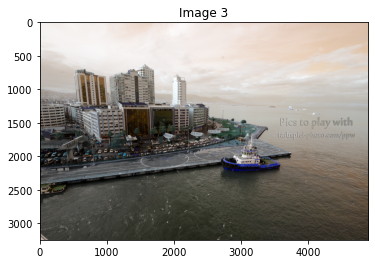

In [14]:
plt.imshow(image3)
plt.title("Image 3")

Text(0.5, 1.0, 'Image résultante 1-3')

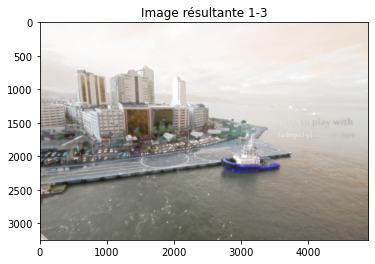

In [15]:
plt.imshow(ImageResultante13)
plt.title("Image résultante 1-3")

4 4


Text(0.5, 1.0, 'Image résultante 3-6')

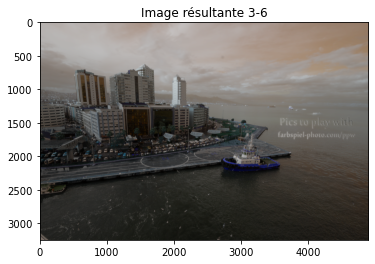

In [12]:
ImageResultante36 = fus_lap_pyr( image3 , image6 , Niveaux )
plt.imshow(ImageResultante36)
plt.title("Image résultante 3-6")

Section 2 : Améliorer la netteté de l'image

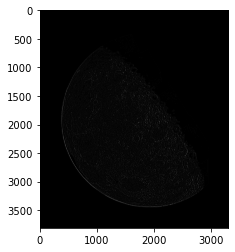

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Retourne la valeur minimale d'un image
# (ou d'un numpy array )
def Min(img):
    return np.amin( img )

# Retourne la valeur maximale d'un image
# (ou d'un numpy array )
def Max(img):
    return np.amax( img )
    
OriginalMoonImage = cv2.imread( 'Images/moon.jpg' , cv2.IMREAD_GRAYSCALE )
H_kernel = 1/4*np.array( [ [ -1,  -1,  -1],
                           [ -1,   8,  -1],
                           [ -1,  -1,  -1] ], dtype="int")

FirstFilteredMoonImage =  cv2.filter2D( OriginalMoonImage , -1, H_kernel )

plt.imshow(FirstFilteredMoonImage , cmap='gray')

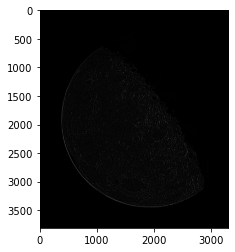

In [15]:
SecondFilterMoonImage = FirstFilteredMoonImage - Min( FirstFilteredMoonImage )
SecondFilterMoonImage = cv2.filter2D( SecondFilterMoonImage , -1 , 255 / Max( FirstFilteredMoonImage ) )

plt.imshow(SecondFilterMoonImage , cmap='gray' )

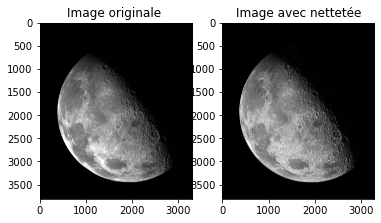

In [24]:
Sharpened = OriginalMoonImage + SecondFilterMoonImage
Sharpened = Sharpened - Min( Sharpened )
Sharpened = cv2.filter2D( Sharpened , -1 , 255 / Max( Sharpened ) )

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(OriginalMoonImage , cmap='gray')
ax1.title.set_text('Image originale ')
ax2.imshow(Sharpened , cmap='gray')
ax2.title.set_text('Image avec nettetée' )